In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
data = pd.read_csv("match_data.csv")
data.index = data["Unnamed: 0"]
data = data.drop("Unnamed: 0", axis = 1)

In [25]:
player_cols = [i for i in data.columns if "players_" in i]
registry_cols = [i for i in data.columns if "registry_" in i]
match_cols = [i for i in data.columns if i not in player_cols and i not in registry_cols]

In [26]:
player_data = data[player_cols]
match_data = data[match_cols]

In [27]:
drop_cols = ["event_name", "gender", "match_type", "team_type"]
match_data = match_data.drop(drop_cols, axis = 1)

In [40]:
match_data.head().teams_0

Unnamed: 0
1269675    Perth Scorchers
1269670    Melbourne Stars
1269669     Sydney Thunder
1269666      Brisbane Heat
1269665     Sydney Thunder
Name: teams_0, dtype: object

<AxesSubplot:>

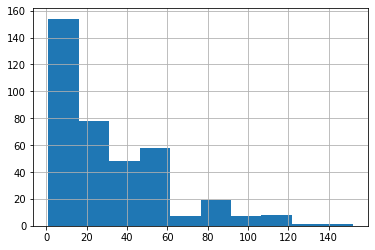

In [32]:
data["outcome_by_runs"].hist()

<AxesSubplot:>

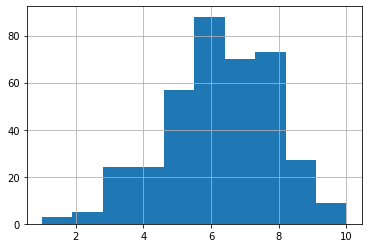

In [31]:
data["outcome_by_wickets"].hist()

In [36]:
"""
Eda Investigations
- Home Team win rate
- do some referees prefer certain teams
- what is the prefered toss decision
- how does toss decision impact outcome
- Do some teams prefere certain locations
""";

In [62]:
pv = pd.pivot_table(match_data, index = ["teams_0", "city"], values = ["outcome_by_runs", "outcome_by_wickets"])
pv["Count"] = pd.pivot_table(match_data, index = ["teams_0", "city"], values = ["outcome_by_runs"], aggfunc='count')
pv.sort_values(["teams_0", "outcome_by_runs"], ascending=False)

outcome_by_runs  outcome_by_wickets  Count
teams_0             city                                                  
Sydney Thunder      Canberra          62.500000            5.000000      8
                    Brisbane          43.750000            5.500000      4
                    Perth             42.500000            6.000000      2
                    Adelaide          34.000000            7.000000      2
                    Melbourne         34.000000            6.250000      4
                    Sydney            24.000000            5.913043     23
Sydney Sixers       Melbourne         42.600000            6.800000      5
                    Hobart            38.000000            7.000000      1
                    Sydney            34.315789            7.315789     19
                    Perth             31.500000            5.750000      8
                    Brisbane          21.500000            5.833333      6
Perth Scorchers     Sydney            49.000000            6.000000      1
                    Launceston        38.000000            6.000000      1
                    Canberra          35.600000            6.800000      5
                    Hobart            35.333333            6.000000      3
                    Melbourne         30.333333            7.333333      3
                    Perth             28.814815            6.388889     54
                    Carrara           10.000000                 NaN      1
Melbourne Stars     Adelaide         111.000000            5.000000      1
                    Sydney            52.000000            1.000000      1
                    Brisbane          36.000000            5.777778      9
                    Melbourne         35.652174            6.652174     23
                    Perth             23.750000            5.750000      8
                    Hobart             9.666667            6.333333      3
                    Carrara            5.000000            6.000000      1
Melbourne Renegades Canberra         111.000000            5.000000      1
                    Hobart            38.000000            6.000000      1
                    Melbourne         27.404762            6.380952     42
                    Geelong           23.750000            6.250000      4
                    Carrara           20.333333            4.333333      3
Hobart Hurricanes   Perth            111.000000            9.000000      1
                    Melbourne         85.000000            5.000000      1
                    Brisbane          36.000000            5.500000      2
                    Hobart            31.758621            6.620690     29
                    Launceston        29.200000            6.000000      5
Brisbane Heat       Carrara           47.000000            5.250000      4
                    Brisbane          30.222222            6.277778     36
                    Adelaide          22.500000            7.000000      2
                    Canberra          17.000000            5.666667      3
                    Hobart            14.000000            5.000000      1
Adelaide Strikers   Perth             45.500000            6.500000      6
                    Melbourne         34.833333            6.166667      6
                    Sydney            28.000000            5.800000      5
                    Adelaide          24.280000            6.920000     25
                    Brisbane          22.400000            6.400000      5
                    Hobart            10.000000            7.000000      3